# E-news Express



## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]


## Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]

4. Is the time spent on the new page the same for the different language users?


## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the dataset

In [3]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/Data Science/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

### Data Overview

The initial steps to get an overview of any dataset is to: 
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

#### Displaying the first few rows of the dataset

In [ ]:
# view the first 5 rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### Displaying the last few rows of the dataset

In [ ]:
# view the last 5 rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


#### Checking the shape of the dataset

In [ ]:
# view the shape of the dataset
df.shape

(100, 6)

#### Checking the data types of the columns for the dataset

In [ ]:
# check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Getting the statistical summary for the numerical variables

In [4]:
#  print the numerical summary statistics
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Getting the statistical summary for the categorical variables

In [ ]:
#  print the categorical summary statistics
# get the summary of categorical variables
categorical_vars = df.select_dtypes(include=['object'])
summary = categorical_vars.describe()

# print the summary
print(summary)

          group landing_page converted language_preferred
count       100          100       100                100
unique        2            2         2                  3
top     control          old       yes            Spanish
freq         50           50        54                 34


### Check for missing values

In [ ]:

df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Check for duplicates

In [ ]:
# find duplicates in the user_id column
duplicates = df[df.duplicated(['user_id'])]

# count the number of duplicates
num_duplicates = len(duplicates)

# print the number of duplicates
print(num_duplicates)

0


### Univariate Analysis

#### Time spent on the page

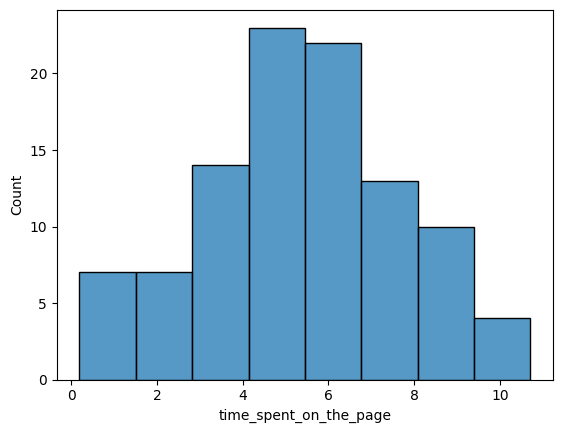

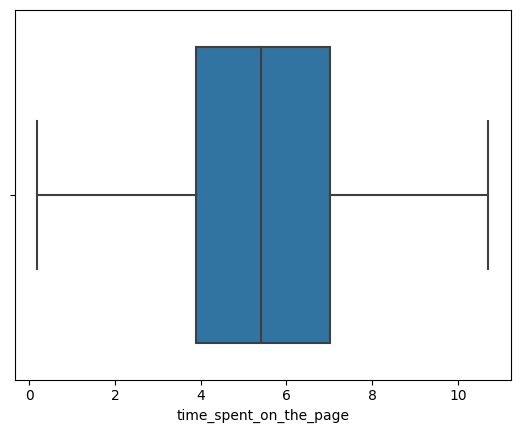

In [ ]:
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

#### Group

In [ ]:
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

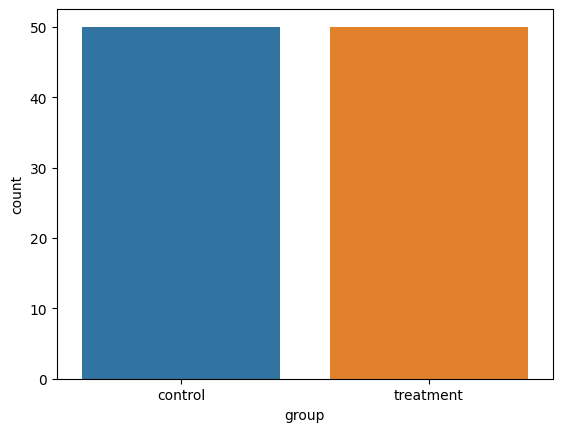

In [ ]:
sns.countplot(data=df,x='group')
plt.show()

#### Landing page

In [ ]:
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

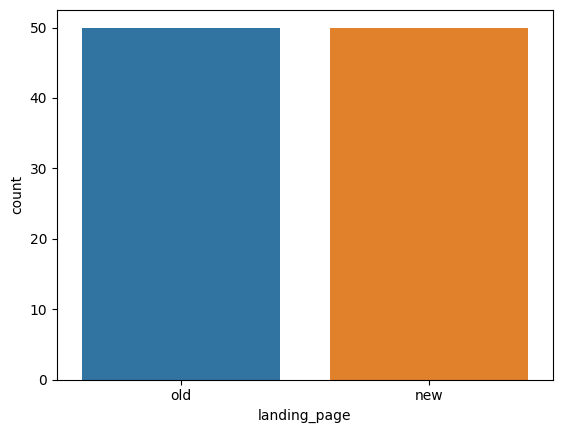

In [ ]:

sns.countplot(data=df,x='landing_page')
plt.show()

#### Converted

In [ ]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

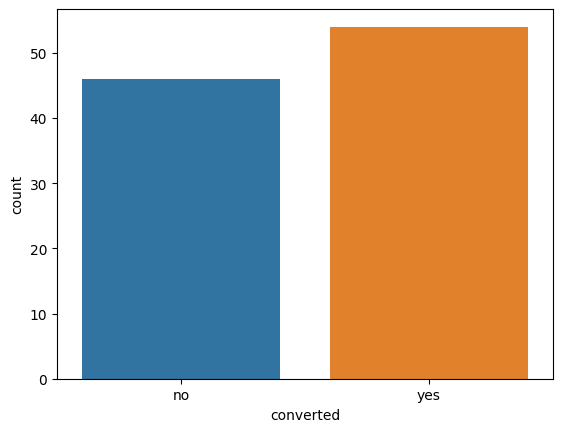

In [ ]:

sns.countplot(data=df,x='converted')
# Show the plot
plt.show()

#### Language preferred

In [ ]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

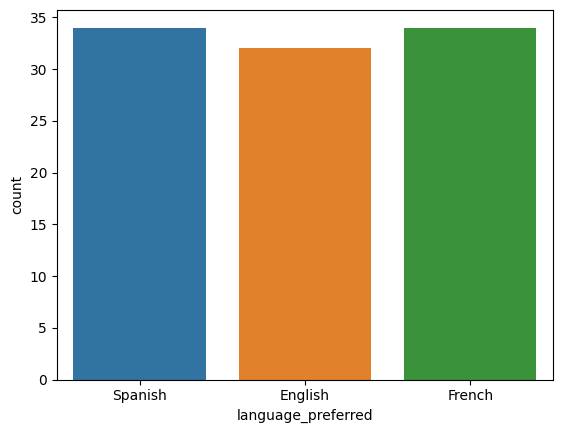

In [ ]:

sns.countplot(data=df,x='language_preferred')
plt.show()

### Bivariate Analysis

#### Landing page vs Time spent on the page

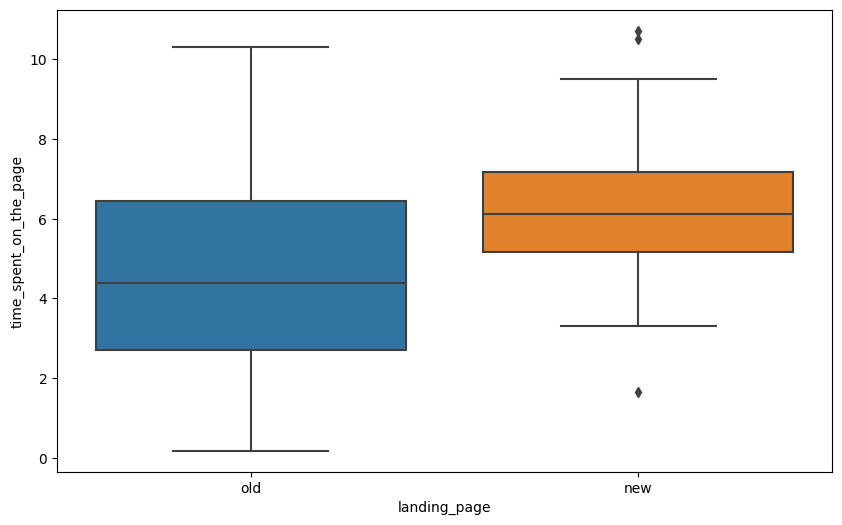

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

<Axes: xlabel='language_preferred', ylabel='count'>

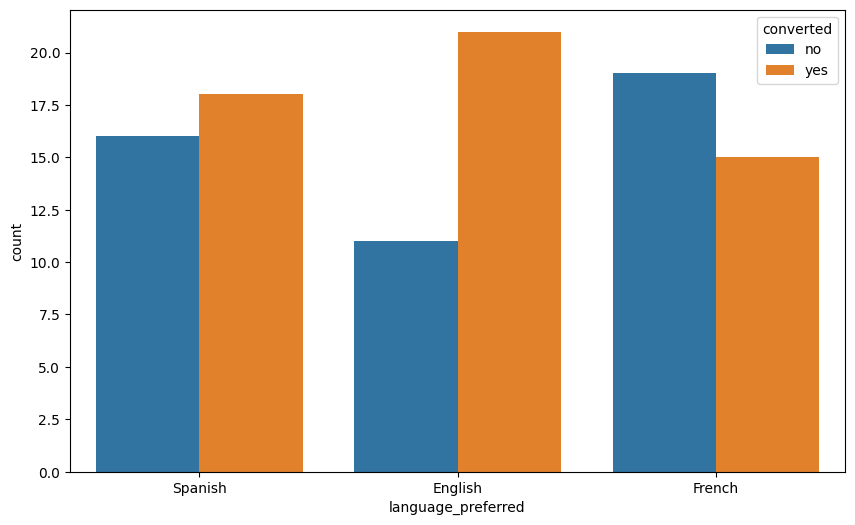

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='language_preferred', hue='converted')

<Axes: xlabel='landing_page', ylabel='count'>

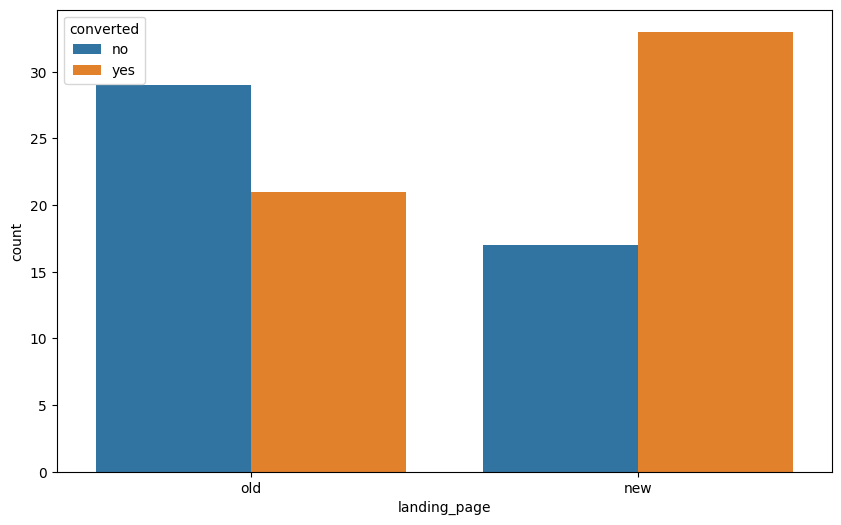

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='landing_page', hue='converted')

#### Conversion status vs Time spent on the page

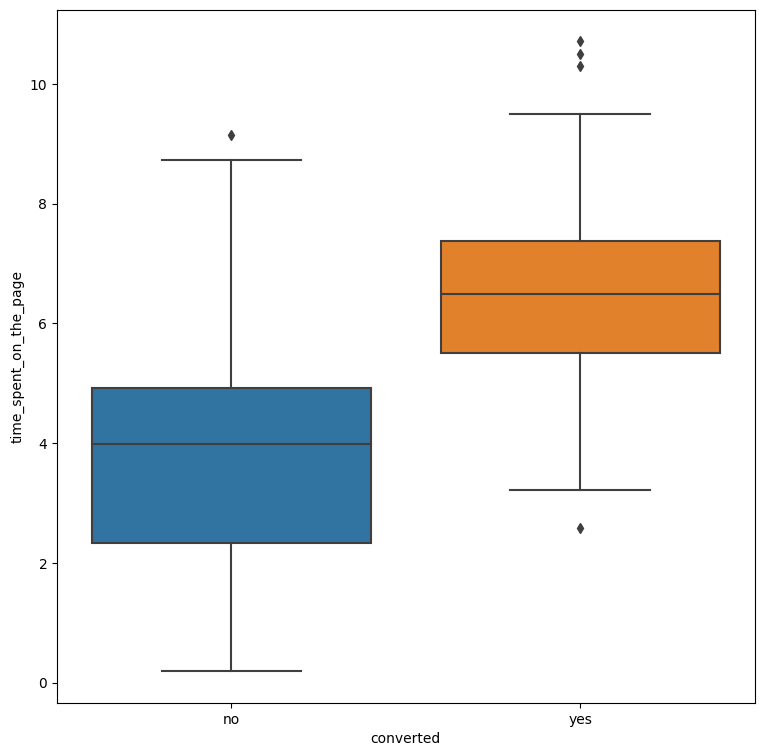

In [ ]:
#  to plot a suitable graph to understand the relationship between 'time_spent_on_the_page' and 'converted' columns
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'converted' , y = 'time_spent_on_the_page')
plt.show()

#### Language preferred vs Time spent on the page

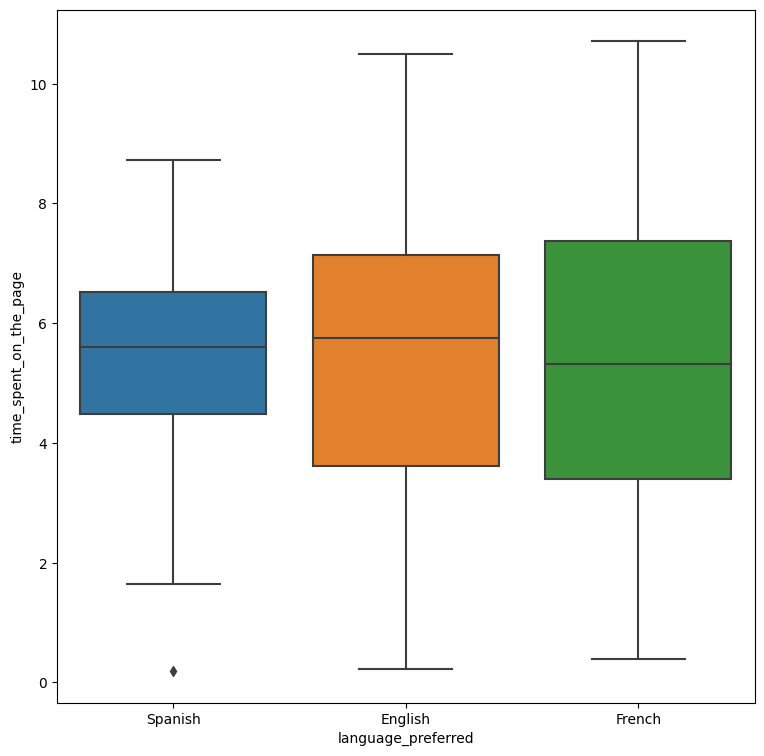

In [ ]:
#  to plot a suitable graph to understand the distribution of 'time_spent_on_the_page' among the 'language_preferred'
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

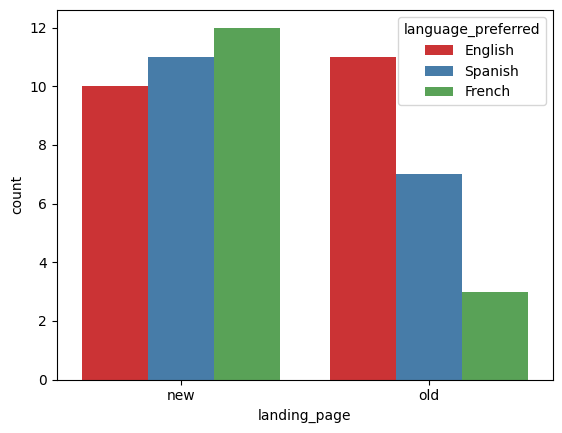

In [ ]:

yes_conv= df[df['converted'] == 'yes']
# Plot a countplot with the 'language_preferred' on the x-axis, 'landing_page' as the hue, and 'group' as the style
sns.countplot(x='landing_page', hue='language_preferred', data=yes_conv, palette='Set1')

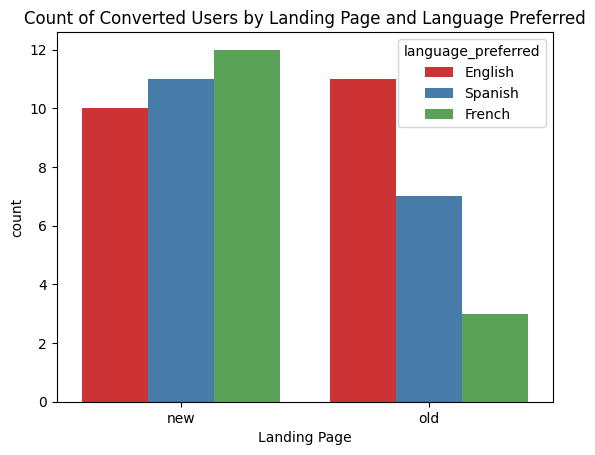

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame called yes_conv containing only the rows where 'converted' is 'yes'

yes_conv = df[df['converted'] == 'yes']

# Create the countplot
ax = sns.countplot(x='landing_page', hue='language_preferred', data=yes_conv, palette='Set1')

# Set the chart title and x-label
ax.set(title='Count of Converted Users by Landing Page and Language Preferred', xlabel='Landing Page')

# Show the plot
plt.show()


## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

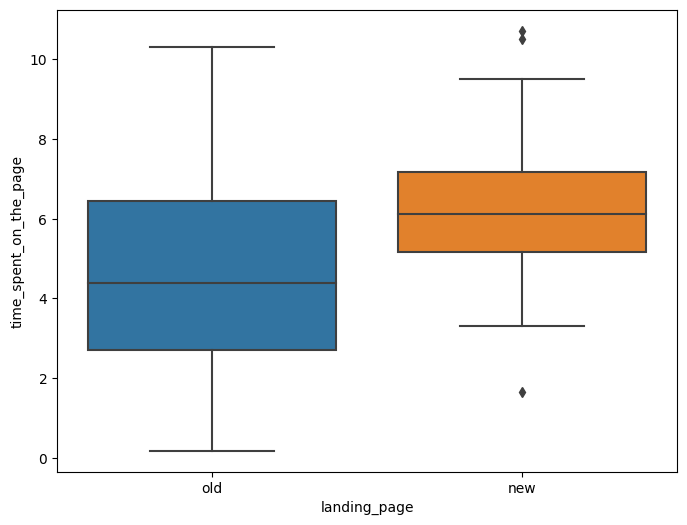

In [ ]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

### Let's write the null and alternative hypothesis
Let $\mu_1, \mu_2$ be the mean time spent on the new page and old page respectively.

Null Hypothesis:

$H_0:\mu_1<=\mu_2$

Alternative Hypothesis:

$H_a:\mu_1>\mu_2$



### Step 2: Select Appropriate test and Make Appropriate Assumptions

This is a one-tailed t-test concerning two population means from two independent populations. The population standard deviations are unknown. **Based on this information, select the appropriate test**.

**Let's test whether the T-test assumptions are satisfied or not:**

Continuous data - Yes, the SAT score is measured on a continuous scale.
Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.
Voila! We can use two sample T-test for this problem.

### Step 3: Decide the significance level

As given in the problem statement, we select $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# create subsetted data frame for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


**Based on the sample standard deviations of the two groups, decide whether the population standard deviations can be assumed to be equal or unequal**.

### Step 5: Calculate the p-value

In [ ]:
#  to import the required function
from scipy.stats import ttest_ind 

#  to calculate the p-value
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater') 

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

There is enough statistical evidence to infer that the mean time spent on the new page is larger than the mean time spent on the old page.



## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

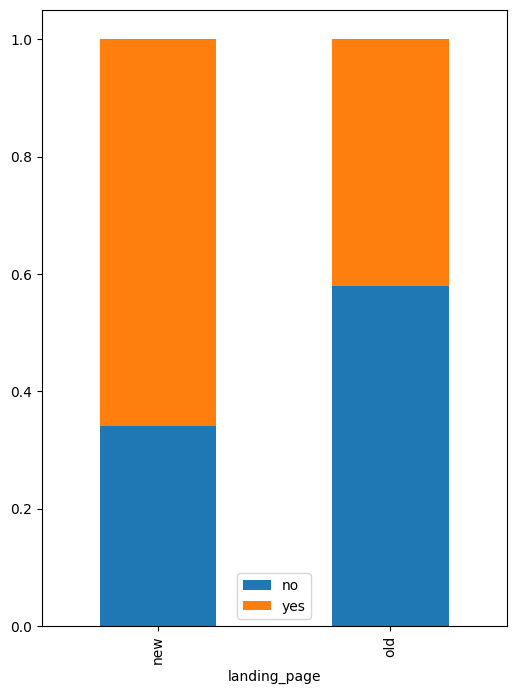

In [ ]:
#  to visually compare the conversion rate for the new page and the conversion rate for the old page
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $p_1,p_2$ be the conversion rates of the new and old page respectively.

$H_0: p_1 <= p_2$

$H_a: p_1>p_2$



### Step 2: Select Appropriate test and Assumptions

This is a one-tailed test concerning two population proportions from two independent populations. **Based on this information, select the appropriate test**.

This is a 2-sample independent proportions z-test.

Assumptions:
Binomally distributed population - Yes, a product is either defective or non-defective.
Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
Can the binomial distribution approximated to normal distribution - Yes. For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively. **CHECK CALCULATIONS.**

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes'] 

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [ ]:
#import the required function
from statsmodels.stats.proportion import proportions_ztest   

#calculate the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')   # by filling appropriate parameters in the blanks


print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

There is enough statistical evidence to say that the conversion rate on the new page is larger than the conversion rate on the old page.



## 3. Does the converted status depend on the preferred language?

### Perform Visual Analysis

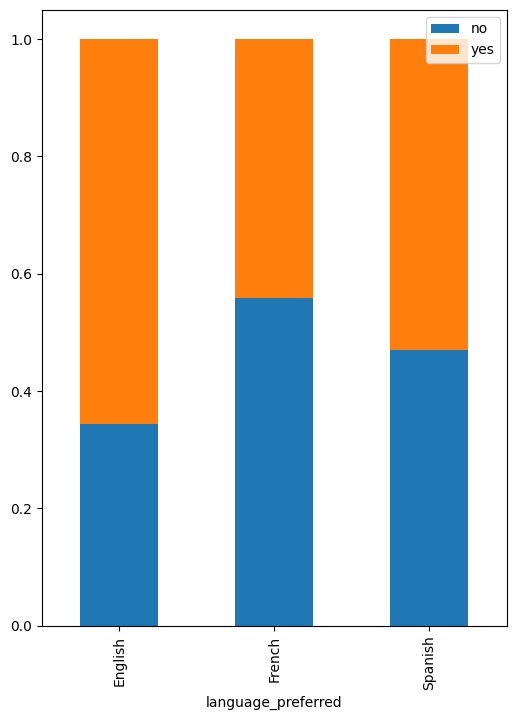

In [ ]:
#visually plot the dependency between conversion status and preferred langauge
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()


### Step 1: Define the null and alternate hypotheses

$H_0:$ Converted Status is independent of the preferred language.

$H_a:$ Converted Status is dependent of the preferred language.



### Step 2: Select Appropriate test and Test Assumtptions

This is a problem of the test of independence, concerning two categorical variables - converted status and preferred language. This is a chi-square test of independence. 
Assumptions:
* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
#  to create a contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['language_preferred'],df['converted'])  

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [ ]:
#import the required function
from scipy.stats import chi2_contingency 

#calculate the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)   # # by filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

There is not enough statistical evidence to say that the converted status is dependent on the preferred language.



## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [ ]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

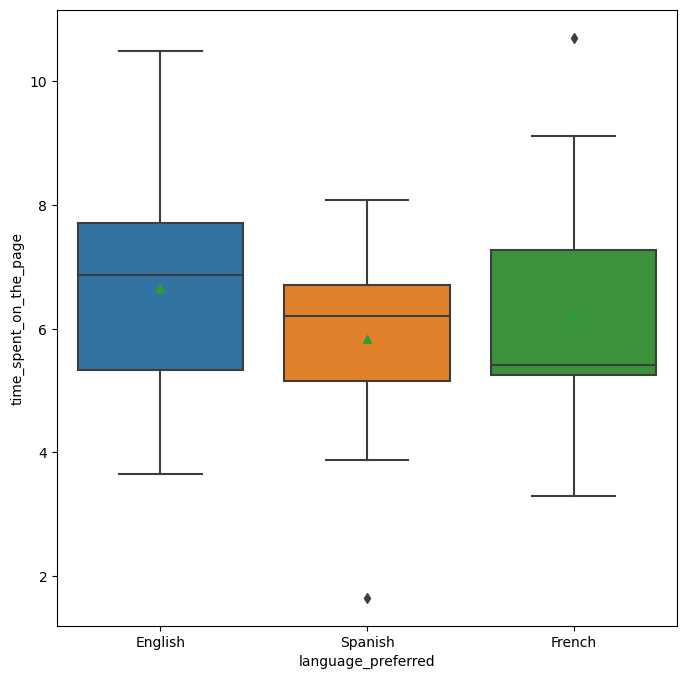

In [ ]:
#visually plot the time spent on the new page for different language users
plt.figure(figsize=(8,8))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True, data = df_new)
plt.show()


In [ ]:
#calculate the mean time spent on the new page for different language users
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()


language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of the time spent spent on the new page for the languages English, French and Spanish respectively.

Null hypothesis

$H_0: \mu_1 = \mu_2 = \mu_3$

Alternative hypothesis

$H_a: $ At least one language's time spent on the page is different from the rest.



### Step 2: Select Appropriate test and Make Assumptions

This is a problem, concerning three population means. This is a one-way ANOVA test.

Now, the normality and equality of variance assumptions need to be checked.

For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

For equality of variance, Levene test is applied to the response variable.

### Shapiro-Wilk’s test


$H_0:$ Time spent on the new page follows a normal distribution

$H_a:$ Time spent on the new page does not follow a normal distribution

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test


$H_0$: All the population variances are equal

$H_a$: At least one variance is different from the rest

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"], 
                                   df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since p-value of the test is very large, we fail to reject the null hypothesis that the population variances are equal.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']   
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']   

### Step 5: Calculate the p-value

In [ ]:
#import the required function
from scipy.stats import f_oneway
#  to calculate the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   #filling appropriate parameters in the blanks

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

There is not enough statistical evidence to suggest that the mean time spent on the new page for different language users is different.
OR
There is enough statistical evidence to say that the mean time spent on the new page for different lagnauge users is the same.



___